# SPACESHIP TITANIC
**EXPLORATORY DATA ANALYSIS**

## Índice

1. Lectura del archivo y descripción del dataset
2. Selección de los datos de interés a analizar 
3. Limpieza de los datos.

    3. Elementos nulos o vacíos
    3. Valores extremos

4. Análisis exploratorio

    4. Análisis descriptivo (gráficos y tal)
    4. Análisis estadístico
    
        - Comprobación de la normalidad y homogeneidad de la varianza
        - Aplicación de pruebas estadísticas (pone que al menos 3)

5. Conclusiones







# Lectura de archivo y descripción del dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [2]:
print('Tamaño del conjunto de datos de entrenamiento:\t {}'.format(df_train.shape))
print('Tamaño del conjunto de datos de test:\t\t {}'.format(df_test.shape))

Tamaño del conjunto de datos de entrenamiento:	 (8693, 14)
Tamaño del conjunto de datos de test:		 (4277, 13)


# Seleccion de datos

In [3]:
df_train = df_train.drop(['PassengerId', 'Name'], axis=1)
df_test = df_test.drop(['PassengerId', 'Name'], axis=1)

df_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [4]:
# Agrupamos las columnas por tipos
categorical_cols = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"]
numeric_cols = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

# Limpieza de datos

## Valores nulos

In [5]:
# Comprobamos valores nulos
df_train.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [6]:
# TO-DO: Explorar metodos de sustitucion de valores nulos más avanzados

# Sustituir nan en las variables categoricas por la moda
for col in categorical_cols:
    df_train[col].fillna(df_train[col].mode()[0], inplace=True)
    
# Sustituir nan en las variables numericas por la media
for col in numeric_cols:
    df_train[col].fillna(df_train[col].mean(), inplace=True)
    
df_train.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [7]:
# Sustituimos valores de True-False por 1 o 0
df_train["CryoSleep"] = df_train["CryoSleep"].map(lambda x: 1 if x==True else 0)
df_train["VIP"] = df_train["VIP"].map(lambda x: 1 if x==True else 0)
df_train["Transported"] = df_train["Transported"].map(lambda x: 1 if x==True else 0)

df_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1


## Outliers

<AxesSubplot:>

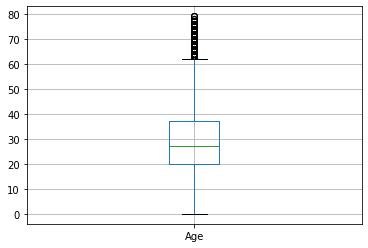

In [8]:
df_train.boxplot(column=['Age'])

Los valores de Age, aunque outliers, entran dentro de valores coherentes de edad, pudiendo haber gente de 0 años hasta 80 años.

<AxesSubplot:>

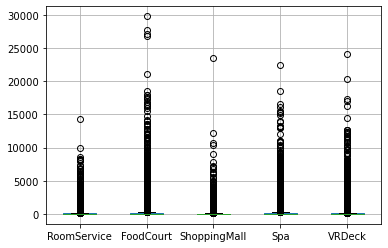

In [23]:
# Agrupamos las columnas que se mueven en la misma escala de valores
df_train.boxplot(column=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']) 

Los valores outliers de las columnas de cargos en los distintos servicios no son reemplazados ni ignorados porque aportan información valioso y coherente, ya que los pasajeros pueden tener niveles muy distintos de poder adquisitivo. 

Los únicos valores que no podrían ser válidos serían menos que 0, pues significaría que les han pagado por utilizar los servicios o que hay personas que menos de 0 años: 

In [27]:
df_train[df_train[numeric_cols] < 0][numeric_cols].sum()

Age             0.0
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

# Analisis exploratorio

Exploramos en este apartado las distintas relaciones entre la variable objetivo "Transported" y el resto de variable para buscar relaciones entre ellas.

Empezamos con las variables categóricas:

<AxesSubplot:title={'center':'Transported = 1'}, ylabel='CryoSleep'>

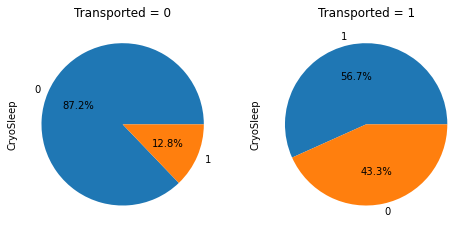

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(8,6))
df_train[df_train['Transported'] == 0]['CryoSleep'].value_counts().plot(kind='pie', 
                                                                         autopct='%1.1f%%', 
                                                                         title='Transported = 0',
                                                                         ax=axs[0])

df_train[df_train['Transported'] == 1]['CryoSleep'].value_counts().plot(kind='pie', 
                                                                         autopct='%1.1f%%', 
                                                                         title='Transported = 1',
                                                                         ax=axs[1])

<AxesSubplot:title={'center':'Transported = 1'}, ylabel='Destination'>

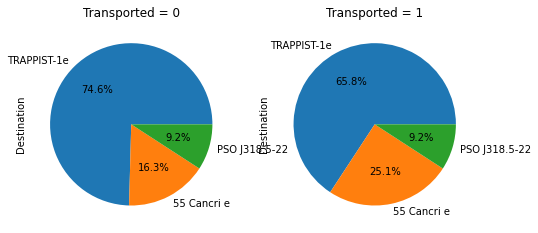

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(8,6))
df_train[df_train['Transported'] == 0]['Destination'].value_counts().plot(kind='pie', 
                                                                         autopct='%1.1f%%', 
                                                                         title='Transported = 0',
                                                                         ax=axs[0])

df_train[df_train['Transported'] == 1]['Destination'].value_counts().plot(kind='pie', 
                                                                         autopct='%1.1f%%', 
                                                                         title='Transported = 1',
                                                                         ax=axs[1])

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8,6))
df_train[df_train['Transported'] == 0]['HomePlanet'].value_counts().plot(kind='pie', 
                                                                         autopct='%1.1f%%', 
                                                                         title='Transported = 0',
                                                                         ax=axs[0])

df_train[df_train['Transported'] == 1]['HomePlanet'].value_counts().plot(kind='pie', 
                                                                         autopct='%1.1f%%', 
                                                                         title='Transported = 1',
                                                                         ax=axs[1])

<AxesSubplot:title={'center':'Transported = 1'}, ylabel='VIP'>

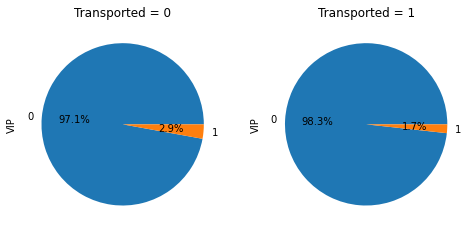

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(8,6))
df_train[df_train['Transported'] == 0]['VIP'].value_counts().plot(kind='pie', 
                                                                         autopct='%1.1f%%', 
                                                                         title='Transported = 0',
                                                                         ax=axs[0])

df_train[df_train['Transported'] == 1]['VIP'].value_counts().plot(kind='pie', 
                                                                         autopct='%1.1f%%', 
                                                                         title='Transported = 1',
                                                                         ax=axs[1])

## Analisis descriptivo

## Analisis estadístico